## Análisis de la Copa del Mundo de Futbol de Qatar 2022

In [1]:
## Librerías utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.api as sfm

In [2]:
## Obtener los datos
df = pd.read_csv('2022worldcup.csv')
df.head()

,Squad,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,...,Gls90,Ast90,G+A90,G-PK90,G+A-PK90,xG90,xAG90,xG+xAG90,npxG90,npxG+xAG90
0,Argentina,24,27.5,57.4,7,77,690,7.7,15,8,...,1.96,1.04,3.00,1.43,2.48,1.96,1.00,2.97,1.47,2.48
1,Australia,20,27.8,37.8,4,44,360,4.0,3,3,...,0.75,0.75,1.50,0.75,1.50,0.58,0.48,1.06,0.58,1.06
2,Belgium,20,29.7,57.0,3,33,270,3.0,1,1,...,0.33,0.33,0.67,0.33,0.67,1.57,1.27,2.85,1.57,2.85
3,Brazil,26,27.6,56.2,5,55,480,5.3,8,6,...,1.50,1.13,2.62,1.31,2.44,2.24,1.54,3.79,2.09,3.64
4,Cameroon,22,27.2,41.7,3,33,270,3.0,4,4,...,1.33,1.33,2.67,1.33,2.67,1.14,0.66,1.80,1.14,1.80


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Squad       32 non-null     object 
 1   # Pl        32 non-null     int64  
 2   Age         32 non-null     float64
 3   Poss        32 non-null     float64
 4   MP          32 non-null     int64  
 5   Starts      32 non-null     int64  
 6   Min         32 non-null     int64  
 7   90s         32 non-null     float64
 8   Gls         32 non-null     int64  
 9   Ast         32 non-null     int64  
 10  G+A         32 non-null     int64  
 11  G-PK        32 non-null     int64  
 12  PK          32 non-null     int64  
 13  PKatt       32 non-null     int64  
 14  CrdY        32 non-null     int64  
 15  CrdR        32 non-null     int64  
 16  xG          32 non-null     float64
 17  npxG        32 non-null     float64
 18  xAG         32 non-null     float64
 19  npxG+xAG    32 non-null     flo

In [4]:
## Análisis Descriptivo
## Selecciones que más goles anotaron
gols = df.nlargest(10, 'Gls')
gols

,Squad,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,...,Gls90,Ast90,G+A90,G-PK90,G+A-PK90,xG90,xAG90,xG+xAG90,npxG90,npxG+xAG90
11,France,24,26.3,51.3,7,77,660,7.3,16,12,...,2.18,1.64,3.82,1.91,3.55,1.88,1.40,3.29,1.67,3.07
0,Argentina,24,27.5,57.4,7,77,690,7.7,15,8,...,1.96,1.04,3.00,1.43,2.48,1.96,1.00,2.97,1.47,2.48
10,England,20,26.1,62.8,5,55,450,5.0,13,11,...,2.60,2.20,4.80,2.40,4.60,1.72,1.12,2.83,1.40,2.52
21,Portugal,24,26.9,60.4,5,55,450,5.0,12,10,...,2.40,2.00,4.40,2.00,4.00,1.57,1.05,2.63,1.26,2.31
19,Netherlands,21,26.8,53.0,5,55,480,5.3,10,8,...,1.87,1.50,3.38,1.87,3.38,0.86,0.54,1.41,0.86,1.41
26,Spain,21,25.5,75.8,4,44,390,4.3,9,5,...,2.08,1.15,3.23,1.85,3.00,1.42,0.92,2.34,1.24,2.16
3,Brazil,26,27.6,56.2,5,55,480,5.3,8,6,...,1.50,1.13,2.62,1.31,2.44,2.24,1.54,3.79,2.09,3.64
7,Croatia,21,28.3,54.3,7,77,690,7.7,8,8,...,1.04,1.04,2.09,1.04,2.09,0.91,0.74,1.65,0.91,1.65
12,Germany,20,27.3,59.3,3,33,270,3.0,6,5,...,2.00,1.67,3.67,1.67,3.33,3.35,2.50,5.85,3.09,5.59
18,Morocco,25,26.3,39.0,7,77,660,7.3,6,4,...,0.82,0.55,1.36,0.82,1.36,0.90,0.63,1.53,0.90,1.53


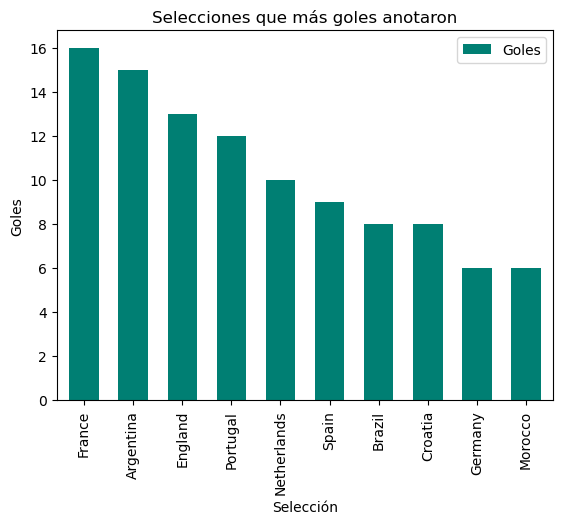

In [5]:
## Gráfico de selecciones que más goles anotaron
gols.plot(kind = 'bar', x = 'Squad', y = 'Gls', label = 'Goles', color = '#007F73', width = 0.6)
plt.xlabel('Selección')
plt.ylabel('Goles')
plt.title('Selecciones que más goles anotaron')
plt.show()

In [6]:
## Selecciones que más minutos jugaron
dfg = df.nlargest(10, 'Min')
## De menor a mayor
dfg = dfg.sort_values(by = 'Min', ascending = True)
dfg

,Squad,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,...,Gls90,Ast90,G+A90,G-PK90,G+A-PK90,xG90,xAG90,xG+xAG90,npxG90,npxG+xAG90
15,Japan,22,28.0,35.8,4,44,390,4.3,5,4,...,1.15,0.92,2.08,1.15,2.08,1.15,0.81,1.96,1.15,1.96
26,Spain,21,25.5,75.8,4,44,390,4.3,9,5,...,2.08,1.15,3.23,1.85,3.00,1.42,0.92,2.34,1.24,2.16
10,England,20,26.1,62.8,5,55,450,5.0,13,11,...,2.60,2.20,4.80,2.40,4.60,1.72,1.12,2.83,1.40,2.52
21,Portugal,24,26.9,60.4,5,55,450,5.0,12,10,...,2.40,2.00,4.40,2.00,4.00,1.57,1.05,2.63,1.26,2.31
3,Brazil,26,27.6,56.2,5,55,480,5.3,8,6,...,1.50,1.13,2.62,1.31,2.44,2.24,1.54,3.79,2.09,3.64
19,Netherlands,21,26.8,53.0,5,55,480,5.3,10,8,...,1.87,1.50,3.38,1.87,3.38,0.86,0.54,1.41,0.86,1.41
11,France,24,26.3,51.3,7,77,660,7.3,16,12,...,2.18,1.64,3.82,1.91,3.55,1.88,1.40,3.29,1.67,3.07
18,Morocco,25,26.3,39.0,7,77,660,7.3,6,4,...,0.82,0.55,1.36,0.82,1.36,0.90,0.63,1.53,0.90,1.53
0,Argentina,24,27.5,57.4,7,77,690,7.7,15,8,...,1.96,1.04,3.00,1.43,2.48,1.96,1.00,2.97,1.47,2.48
7,Croatia,21,28.3,54.3,7,77,690,7.7,8,8,...,1.04,1.04,2.09,1.04,2.09,0.91,0.74,1.65,0.91,1.65


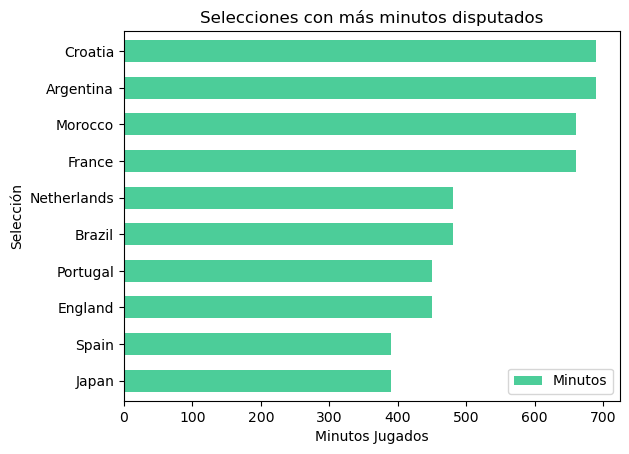

In [7]:
dfg.plot(kind = 'barh', x = 'Squad', y = 'Min', label = 'Minutos',  color = '#4CCD99', width = 0.6)
plt.xlabel('Minutos Jugados')
plt.ylabel('Selección')
plt.title('Selecciones con más minutos disputados')
plt.show()
## Las selecciones que más minutos jugaron en Qatar 2022

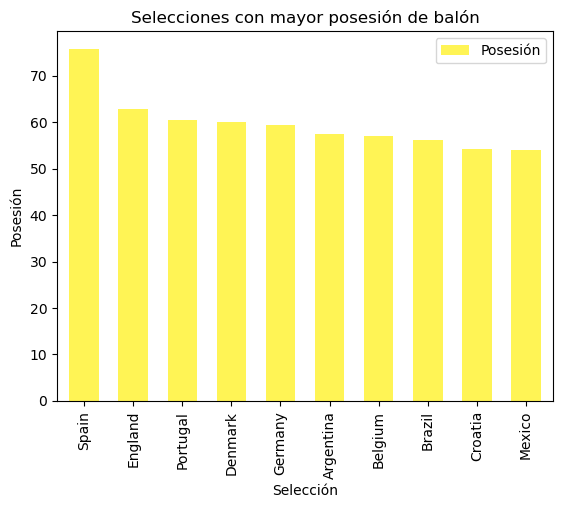

In [8]:
## Selecciones que tuvieron mayor posesión de balón 
pos = df.nlargest(10, 'Poss')
pos
pos.plot(kind = 'bar', x = 'Squad', y = 'Poss', label = 'Posesión', color = '#FFF455', width = 0.6)
plt.xlabel('Selección')
plt.ylabel('Posesión')
plt.title('Selecciones con mayor posesión de balón')
plt.show()

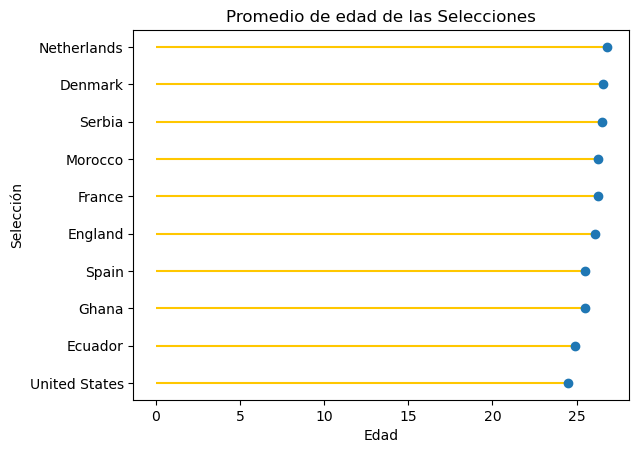

In [9]:
## Selecciones con el promedio de edad más corta
jov = df.nsmallest(10, 'Age')
jov
m_range = range(1, len(jov.index) +1)
plt.hlines(y = m_range, xmin = 0, xmax = jov['Age'], color = '#FFC700')
plt.plot(jov['Age'], m_range,'o')

plt.yticks(m_range,jov['Squad'])
plt.title('Promedio de edad de las Selecciones')
plt.xlabel('Edad')
plt.ylabel('Selección')
plt.show()

Text(0.5, 1.0, 'Edades de los jugadores que disputaron la Copa del Mundo')

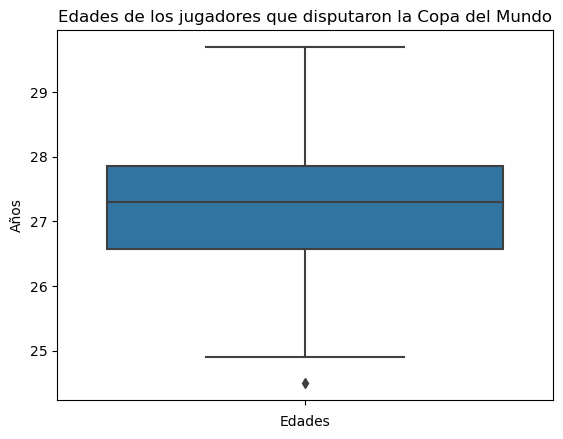

In [10]:
## Boxplot
ax = sns.boxplot(y = 'Age', data = df)
plt.ylabel('Años')
plt.xlabel('Edades')
plt.title('Edades de los jugadores que disputaron la Copa del Mundo')
## Se puede ver que la mediana de la edad de los jugadores que disputaron el torneo fue de 27 años aproximadamente

Text(0.5, 1.0, 'Edades de los jugadores que disputaron la Copa del Mundo')

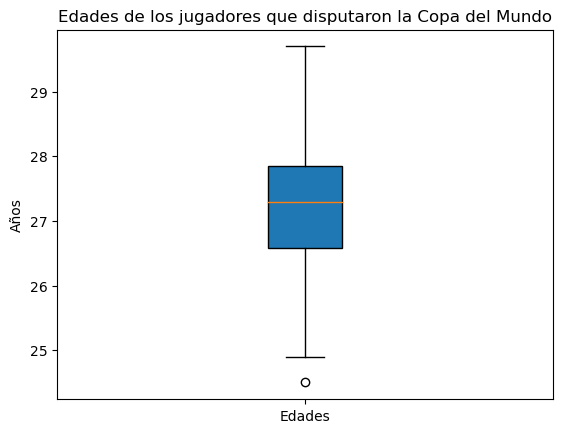

In [11]:
plt.boxplot(x = 'Age', data = df, patch_artist = True, labels = ['Edades'])
plt.ylabel('Años')
plt.title('Edades de los jugadores que disputaron la Copa del Mundo')

Text(0.5, 1.0, 'Goles anotados por las selecciones de futbol')

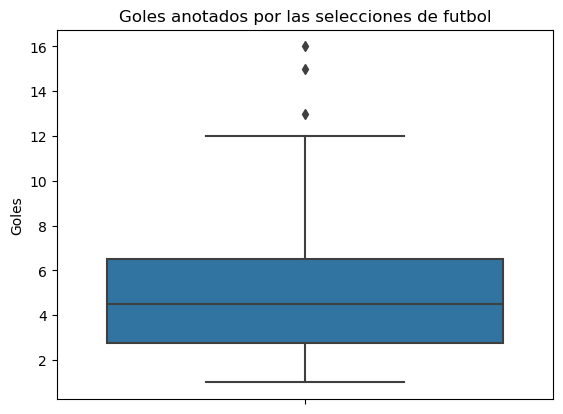

In [12]:
sns.boxplot(y = 'Gls', data = df)
plt.ylabel('Goles')
plt.title('Goles anotados por las selecciones de futbol')
## Se aprecia que la mediana de goles anotados por las selecciones de futbol en la copa del mundo fue de 4 aproximadamente

Text(0.5, 1.0, 'Asistencias durante la Copa del Mundo')

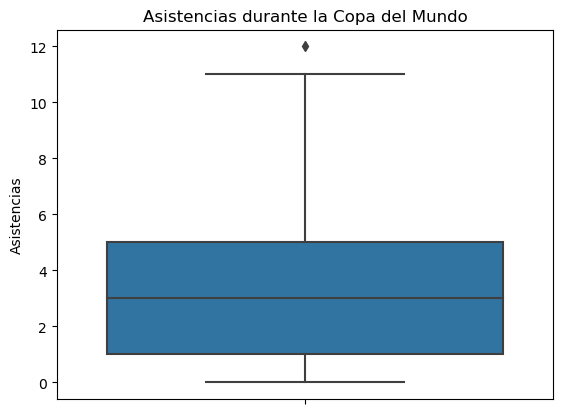

In [13]:
sns.boxplot(y = 'Ast', data = df)
plt.ylabel('Asistencias')
plt.title('Asistencias durante la Copa del Mundo')
## La cantidad de asistencias durante el mundial fue de 3 aproximadamente

Text(0.5, 1.0, 'Posesión de balón durante la Copa del Mundo')

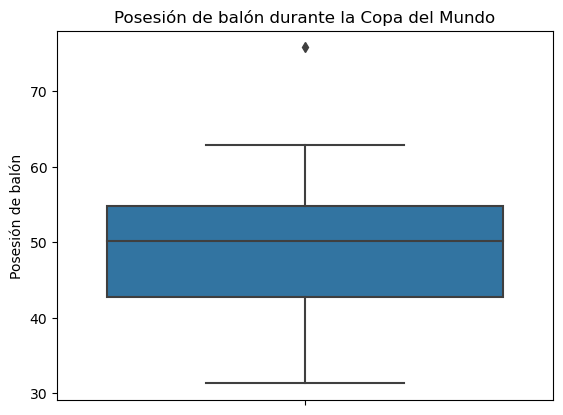

In [16]:
sns.boxplot(y = 'Poss', data = df)
plt.ylabel('Posesión de balón')
plt.title('Posesión de balón durante la Copa del Mundo')
## El boxplot de la Posesión de balón de los equipos para ver la variabilidad que se presentó, descubriendo valores extremos
## arriba del 70%

Text(0, 0.5, 'Goles anotados')

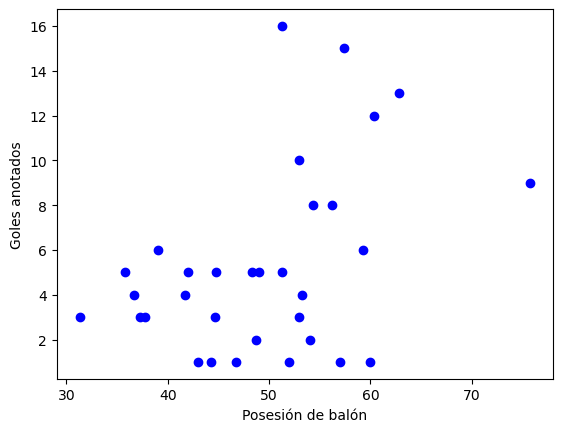

In [17]:
## Relación entre la posesión y la cantidad de goles anotados
x = df['Poss']
y = df['Gls']
plt.scatter(x,y, c = 'blue')
plt.xlabel('Posesión de balón')
plt.ylabel('Goles anotados')

In [18]:
corre = df['Poss'].corr(df['Gls'])
print(f'Correlación entre la posesión del balón y los goles anotados: {corre}')
## La correlación entre la posesión del balón y los goles anotados fue de 41%, no existe una relación fuerte
## Se ajustará un modelo de regresión lineal simple para determinar si se podrían hacer buenas predicciones entre 
## la posesión de balón de un equipo y los goles anotados

Correlación entre la posesión del balón y los goles anotados: 0.41874316205781276


In [19]:
## Seleccionar una muestra de entrenamiento y una de prueba, del 80 y del 20% respectivamente
x_train, x_test, y_train, y_test = train_test_split(
                                          x.values.reshape(-1,1),
                                          y.values.reshape(-1,1),
                                          train_size = 0.8,
                                          random_state = 123,
                                          shuffle = True)
## Ajustar un modelo
x_train = sm.add_constant(x_train, prepend = True)
modelo = sm.OLS(endog = y_train, exog = x_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     7.965
Date:                Fri, 05 Apr 2024   Prob (F-statistic):            0.00966
Time:                        09:47:39   Log-Likelihood:                -67.890
No. Observations:                  25   AIC:                             139.8
Df Residuals:                      23   BIC:                             142.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.7132      4.415     -1.521      0.1

In [20]:
## El R cuadrado y el R ajustado fueron valores bajos, el intercepto no parece ser significativo, por lo que su valor verdadero
## es de cero, estos valores nos indican que no es un buen modelo para relacionar la posesión de balón con los goles anotados
## Intervalos de confianza
confianza = modelo.conf_int(alpha = 0.05)
confianza

array([[-15.8465135 ,   2.42003754],
       [  0.06913392,   0.44868053]])

In [22]:
## Predicciones con un intervalo de confianza del 95%
predicciones = modelo.get_prediction(exog = x_train).summary_frame(alpha = 0.05)
predicciones

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,8.924758,1.415236,5.997120,11.852396,0.511521,17.337995
1,6.568703,0.842167,4.826546,8.310859,-1.508834,14.646239
2,4.859915,0.801896,3.201066,6.518764,-3.200065,12.919894
3,3.384144,1.084383,1.140927,5.627360,-4.816070,11.584358
4,4.083193,0.924833,2.170030,5.996357,-4.032944,12.199330
5,7.837348,1.110238,5.540646,10.134050,-0.377658,16.052354
6,4.885806,0.799106,3.232729,6.538882,-3.172988,12.944599
7,5.791981,0.766982,4.205358,7.378604,-2.253444,13.837406
8,2.788657,1.243280,0.216737,5.360578,-5.507502,11.084817
9,2.944001,1.200282,0.461030,5.426973,-5.325015,11.213018


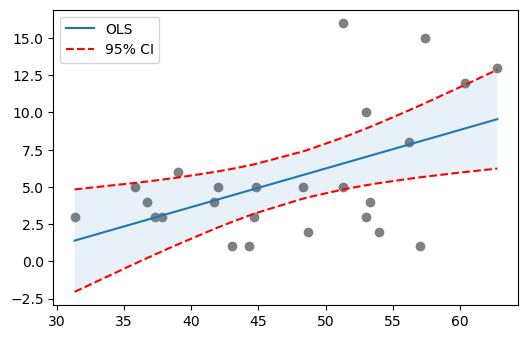

In [23]:
## Gráfico del modelo
predicciones = modelo.get_prediction(exog = x_train).summary_frame(alpha = 0.05)
predicciones['x'] = x_train[:,1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

fig, ax = plt.subplots(figsize= (6, 3.84))
ax.scatter(predicciones['x'], predicciones['y'], marker = 'o',color = 'gray')
ax.plot(predicciones['x'],predicciones['mean'], linestyle = '-', label = 'OLS')
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();

In [24]:
## Quizá si se incluye otra variable al modelo, este podría mejorar, en este caso se tomará en cuenta el promedio de edad
## de los jugadores
x2 = df.iloc[:,2:3]
y2 = df['Gls']
corre2 = df['Age'].corr(df['Gls'])
print(f'Correlación entre la edad y los goles anotados: {corre2}')

## La relación entre la edad de los jugadores y los goles anotados es negativa, es decir, entre mayor es el promedio de 
## edad de los jugadores, menor es la cantidad de goles anotados, aunque no es muy fuerte la relación

Correlación entre la edad y los goles anotados: -0.24849093003441267


In [25]:
## Datos de entrenamiento y de prueba
x2_train, x2_test, y2_train, y2_test = train_test_split(
                                             x2,
                                             y2.values.reshape(-1,1),
                                             train_size = 0.8,
                                             random_state = 123,
                                             shuffle = True)

## Ajuste del modelo
mult = sfm.OLS(y2_train, x2_train)
reg_mult = mult.fit()
print(reg_mult.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.618
Model:                            OLS   Adj. R-squared (uncentered):              0.602
Method:                 Least Squares   F-statistic:                              38.82
Date:                Fri, 05 Apr 2024   Prob (F-statistic):                    1.94e-06
Time:                        10:15:00   Log-Likelihood:                         -72.073
No. Observations:                  25   AIC:                                      146.1
Df Residuals:                      24   BIC:                                      147.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [26]:
## De esta manera el modelo mejora bastante, el coeficiente que representa la edad en el modelo es significativo, los valores 
## de R cuadrado y ajustado son de arriba de 0.60, son más significativos

In [28]:
## Intervalos de confianza
confianza2 = reg_mult.conf_int(alpha = 0.05)
confianza2

,0,1
Age,0.134864,0.268469


In [27]:
predicciones2 = reg_mult.get_prediction(exog = x2_train).summary_frame(alpha = 0.05)
predicciones2
## Las predicciones hechas con el modelo que tiene dos variables explicativas son más confiables

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
21,5.424831,0.870672,3.627853,7.221808,-3.857246,14.706907
11,5.303831,0.851251,3.546934,7.060727,-3.970570,14.578231
23,5.505497,0.883618,3.681798,7.329196,-3.781790,14.792784
18,5.303831,0.851251,3.546934,7.060727,-3.970570,14.578231
4,5.485331,0.880382,3.668312,7.302349,-3.800647,14.771308
3,5.565997,0.893329,3.722258,7.409737,-3.725246,14.857240
24,5.424831,0.870672,3.627853,7.221808,-3.857246,14.706907
16,5.686997,0.912749,3.803176,7.570818,-3.612283,14.986277
14,5.747497,0.922459,3.843636,7.651358,-3.555863,15.050857
20,5.606330,0.899802,3.749231,7.463430,-3.687573,14.900234
